In [172]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
from rdkit import Chem, DataStructs
from rdkit.Chem import (
PandasTools,
Draw,
Descriptors,
MACCSkeys,
rdFingerprintGenerator,
AllChem,
)

In [160]:
molecule_smiles = [
"CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4O)O)O)O)C(=O)N)N(C)C)O",
"CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C(=O)O)C",
"C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl",
"CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC",
"C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl"]

molecule_names = [
    "Doxycycline",
    "Amoxicillin",
    "Furosemide",
    "Glycol Dilaurate",
    "Hydrochlorothiazide"
]

In [161]:
molecules = pd.DataFrame({"smiles": molecule_smiles, "name":
molecule_names})
PandasTools.AddMoleculeColumnToFrame(molecules, smilesCol="smiles")
# Show first 2 molecules
molecules.head(2)

,smiles,name,ROMol
0,CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Doxycycline,<rdkit.Chem.rdchem.Mol object at 0x776dd49bf8b0>
1,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...,Amoxicillin,<rdkit.Chem.rdchem.Mol object at 0x776dd49bc6d0>


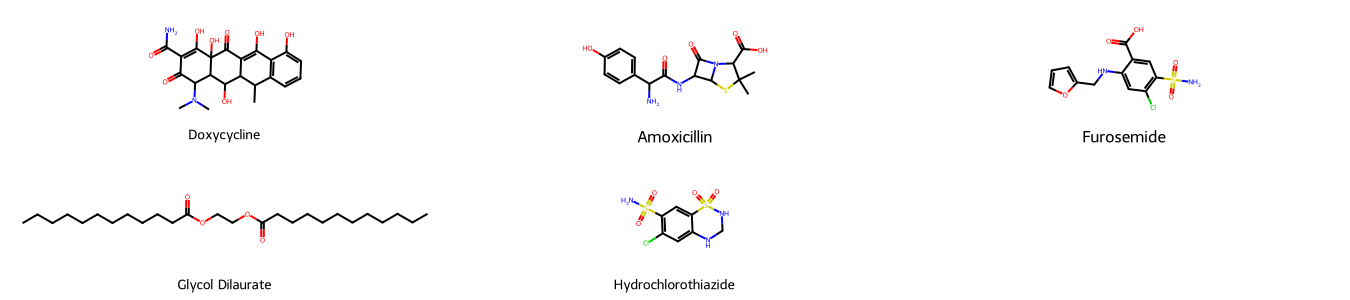

In [162]:
Draw.MolsToGridImage(
molecules["ROMol"].to_list(),
molsPerRow=3,
subImgSize=(450, 150),
legends=molecules["name"].to_list())

In [163]:
molecules["molecule_weight"] = molecules.ROMol.apply(Descriptors.MolWt)
# Sort molecules by molecular weight
molecules.sort_values(["molecule_weight"], ascending=False, inplace=True)
print(molecules)

                                              smiles                 name  \
0  CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...          Doxycycline   
3               CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC     Glycol Dilaurate   
1  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...          Amoxicillin   
2     C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl           Furosemide   
4          C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl  Hydrochlorothiazide   

                                              ROMol  molecule_weight  
0  <rdkit.Chem.rdchem.Mol object at 0x776dd49bf8b0>          444.440  
3  <rdkit.Chem.rdchem.Mol object at 0x776dd49d4ac0>          426.682  
1  <rdkit.Chem.rdchem.Mol object at 0x776dd49bc6d0>          365.411  
2  <rdkit.Chem.rdchem.Mol object at 0x776dd49d50e0>          330.749  
4  <rdkit.Chem.rdchem.Mol object at 0x776dd49d5460>          297.745  


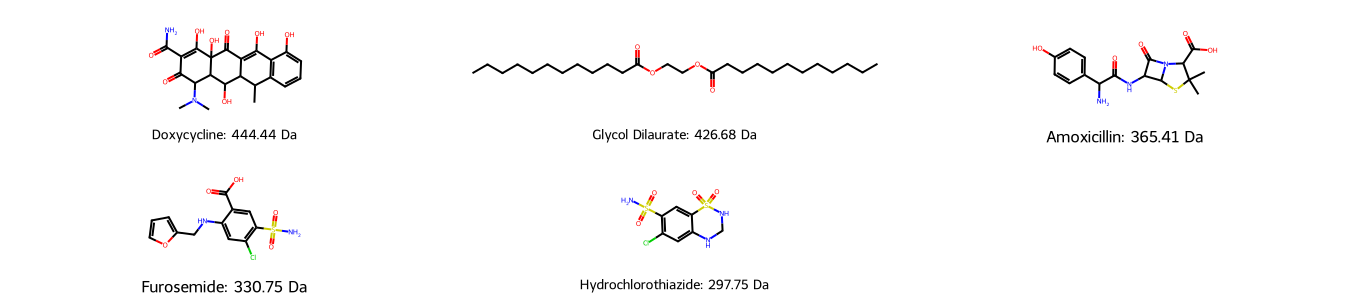

In [164]:
Draw.MolsToGridImage(
molecules["ROMol"],
legends=[
f"{molecule['name']}: {molecule['molecule_weight']:.2f} Da"
for index, molecule in molecules.iterrows()
],
subImgSize=(450, 150),
molsPerRow=3,
)

In [173]:
molecules["maccs"] = molecules.ROMol.apply(MACCSkeys.GenMACCSKeys)
molecules ["morgan" ] = molecules["ROMol"].apply(lambda mol:AllChem.GetMorganFingerprintAsBitVect
                                                 (mol, 2, nBits=2048, useChirality=False) )
molecules.head(2)

,smiles,name,ROMol,molecule_weight,maccs,morgan,tanimoto_maccs,dice_maccs,tanimoto_morgan,dice_morgan
0,CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Doxycycline,<rdkit.Chem.rdchem.Mol object at 0x776dd49bf8b0>,444.440,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.00000,1.000000,1.000000
3,CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC,Glycol Dilaurate,<rdkit.Chem.rdchem.Mol object at 0x776dd49d4ac0>,426.682,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.149254,0.25974,0.054795,0.103896


In [166]:
molecule_query = molecules["maccs"][0] #WE CALCULATE THE TANIMOTO VALUE AGAINST THE 1ST MOLECULE
molecule_list = molecules["maccs"].to_list()
# Calculate similarty values between query and list elements
molecules["tanimoto_maccs"] = DataStructs.BulkTanimotoSimilarity(molecule_query, molecule_list)
molecules["dice_maccs"] = DataStructs.BulkDiceSimilarity(molecule_query, molecule_list)
molecules.head(2)

,smiles,name,ROMol,molecule_weight,maccs,morgan,tanimoto_maccs,dice_maccs
0,CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Doxycycline,<rdkit.Chem.rdchem.Mol object at 0x776dd49bf8b0>,444.440,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.00000
3,CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC,Glycol Dilaurate,<rdkit.Chem.rdchem.Mol object at 0x776dd49d4ac0>,426.682,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.149254,0.25974


In [167]:
preview = molecules.sort_values(["tanimoto_maccs"],ascending = False).reset_index()
preview[["name", "tanimoto_maccs", "dice_maccs"]]
# NBVAL_CHECK_OUTPUT
#Tanimoto and Dice = 1 for Doxycycline bc this the same molecule

,name,tanimoto_maccs,dice_maccs
0,Doxycycline,1.000000,1.000000
1,Amoxicillin,0.590909,0.742857
2,Furosemide,0.321839,0.486957
3,Hydrochlorothiazide,0.306818,0.469565
4,Glycol Dilaurate,0.149254,0.259740


In [168]:
def draw_ranked_molecules(molecules, sort_by_column):
    molecules_sorted = molecules.sort_values(
        [sort_by_column],
        ascending=False).reset_index()
    return Draw.MolsToGridImage(
        molecules_sorted["ROMol"],
        legends=[
        f"#{index+1} {molecule['name']}, similarity={molecule[sort_by_column]:.2f}"
        for index, molecule in molecules_sorted.iterrows()
        ],
        molsPerRow=3, subImgSize=(450, 150),
    )

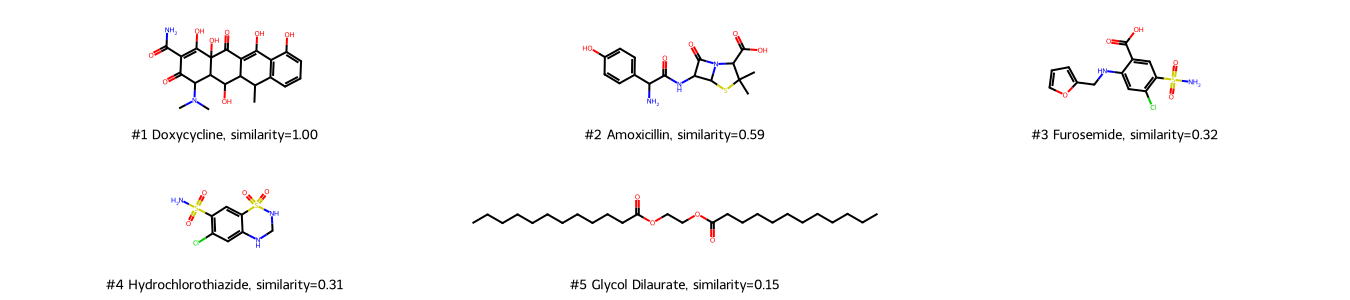

In [169]:
draw_ranked_molecules(molecules, "tanimoto_maccs")

In [170]:
molecule_query = molecules["morgan"][0]
molecule_list = molecules["morgan"].to_list()
# Calculate similarty values between query and list elements
molecules["tanimoto_morgan"] = DataStructs.BulkTanimotoSimilarity(molecule_query, molecule_list)
molecules["dice_morgan"] = DataStructs.BulkDiceSimilarity(molecule_query,
molecule_list)

In [171]:
molecules.to_csv("mol.csv")